# Week 2:

There are 147 categories, however there are some categories have very little reviews so I will only use 58 topics that have the most reviews.

In [1]:
import math
from gensim import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
from pathlib2 import Path

In [4]:
allfiles = os.listdir('categories')
cuisines = [f.replace('.txt','') for f in allfiles]
contents = [Path('categories/'+f).read_text(encoding="utf8")
            .replace('\n',' ') for f in allfiles]

In [5]:
def vectorizer(content,use_idf = False, max_df = .9):
    vectorizer = TfidfVectorizer(stop_words='english', 
                                 use_idf=use_idf,max_df=max_df)
    matrix = vectorizer.fit_transform(contents)
    id2words ={}
    for i,word in enumerate(vectorizer.get_feature_names()):
        id2words[i] = word
    return matrix,np.vstack([cosine_similarity(val, matrix)
                             for val in matrix]),id2words

In [6]:
%matplotlib inline

def draw(matrix):
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap=cm.coolwarm)
    ax.set_xticks(np.arange(matrix.shape[1]), minor=False)
    ax.set_yticks(np.arange(matrix.shape[0]), minor=False)
    ax.set_xticklabels(cuisines, rotation='vertical')
    ax.set_yticklabels(cuisines)
    fig.set_size_inches(15, 12)
    plt.show()

## Task 2.1:

This task I will make visualization based on word count and compare their differences base on cosine distance. However, I'll ignore all words that appeared in more than 90% of categories so the comment words like great or love will be ignored.

The result really make some sense consider each categorie has a unique set of words and the similarity is very minor as words need to be appear at a similar frequency. So only very closed pairs of categories will be colored red like American New and Traditional or Italian and Pizza.

In [7]:
matrix_if,similarity_if,_ = vectorizer(contents)

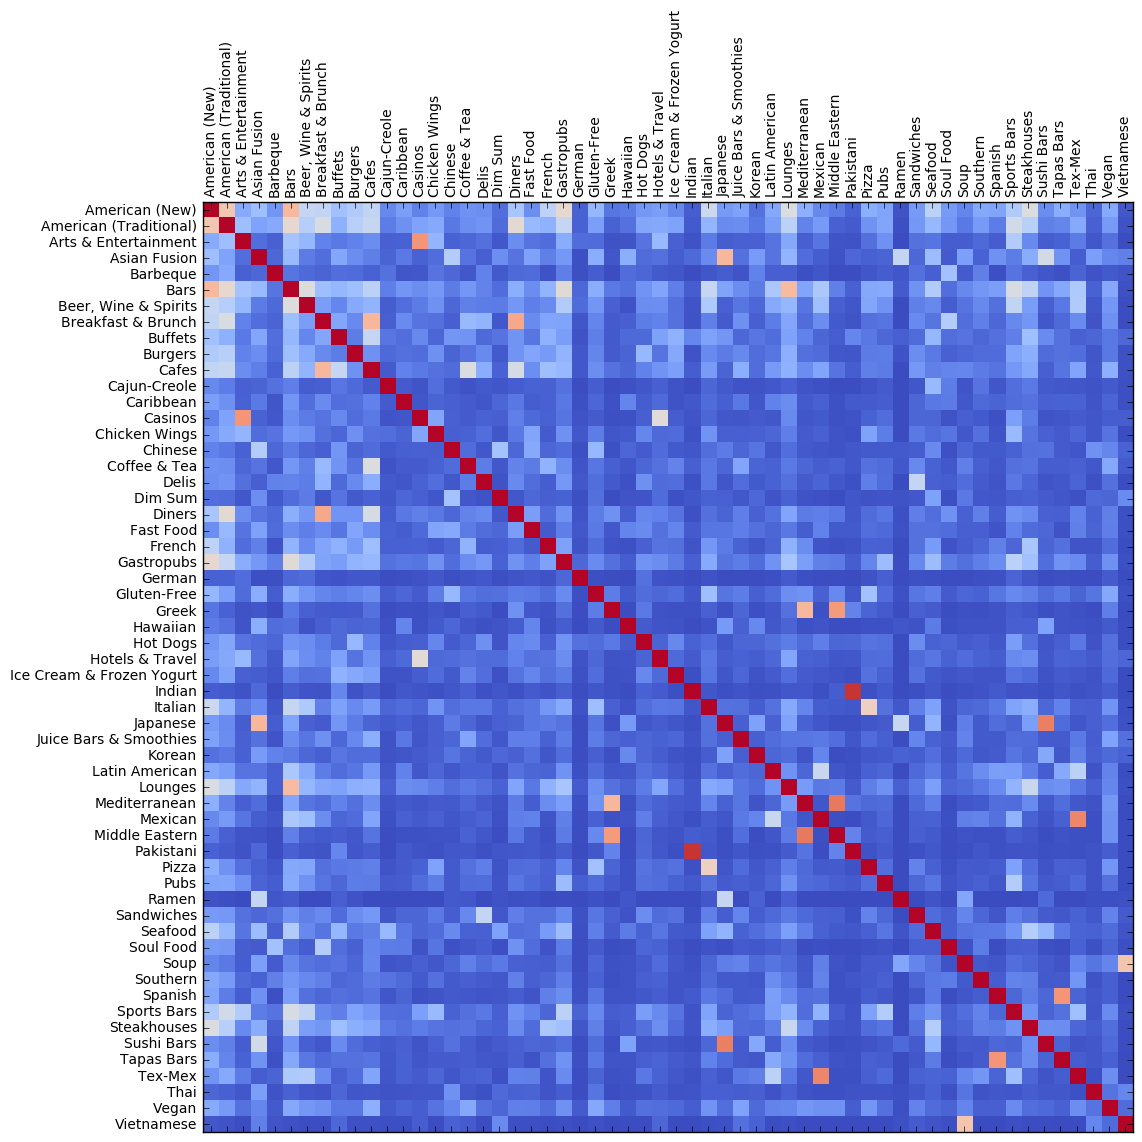

In [8]:
draw(similarity_if)

## Task 2.2:

This task I will make visualization based on IF_IDF and compare their differences base on cosine distance. However, I'll ignore all words that appeared in more than 90% of categories so the comment words like great or love will be ignored.

The result is not so different from task 2.1 and I think that because exept from some very unique words of categories, other words often appeared in many categories so their IF_IDF value is not much different from their IF value.

In [9]:
matrix_ifidf,similarity_ifidf,id2words = vectorizer(contents,True)

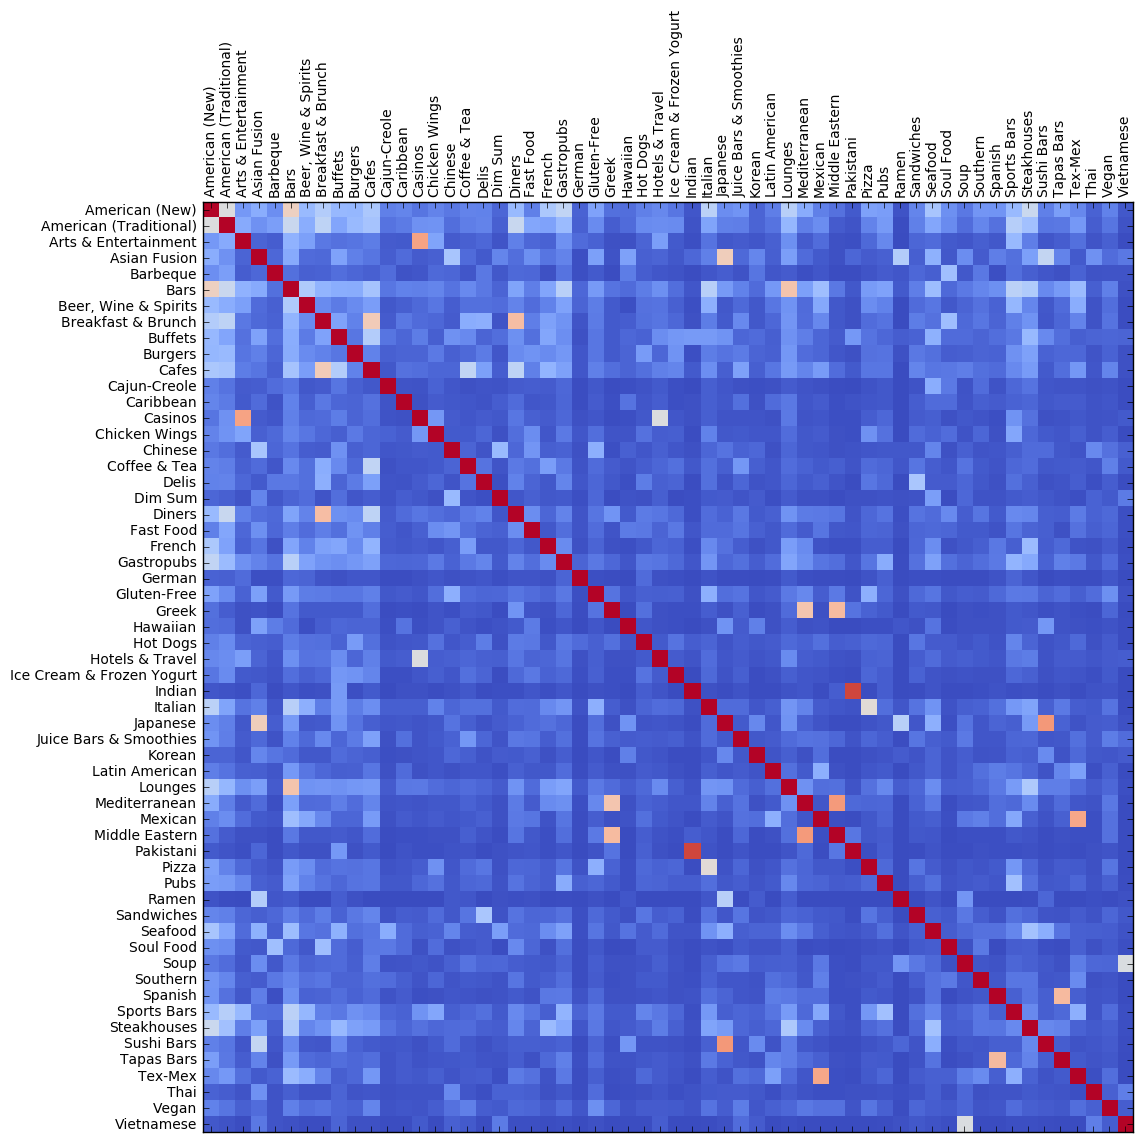

In [10]:
draw(similarity_ifidf)

## Task 2.3:
In this task I will use LDA modeling as clustering and assign categories into some topics. After that, I set vector represent each categories equal vector represent probability of each category belong to each topic. Base on these vector, I created matrix distance base on cosine metric. I tested 2,5 and 10 as number of topic for comparison.

It's clear that 2 is too small for number of topic as it make almost all categories similar. We can not learn much from this visualization.
I think 5 topics is quite good as we can see with categories are similar with other like Asian Fusion with Chinese, Japanese, Thai, Vietnames food.
Using 10 topics, I think that the map is mostly represent the characteristic of restaurants for example, the cell represent relation between American(New) and Buffet are Red, it means there are many American restaurants offer Buffet.

In [17]:
def draw_ntopic(ntopic):
    corpus = matutils.Sparse2Corpus(matrix_ifidf, 
                                    documents_columns=False)
    
    lda = models.LdaMulticore(corpus, num_topics=ntopic, 
                              id2word=id2words)
    
    topic_pro = np.zeros((len(cuisines), ntopic))
    
    idx = 0
    for val in lda.get_document_topics(corpus,
                                       minimum_probability=-1):
        for jdx,pro in val:
            topic_pro[idx][jdx]=pro
        idx += 1
    
    print "Number of topic:",ntopic
    draw(np.vstack([cosine_similarity(val.reshape(1,-1), 
                                      topic_pro)
                    for val in topic_pro]))

Number of topic: 2


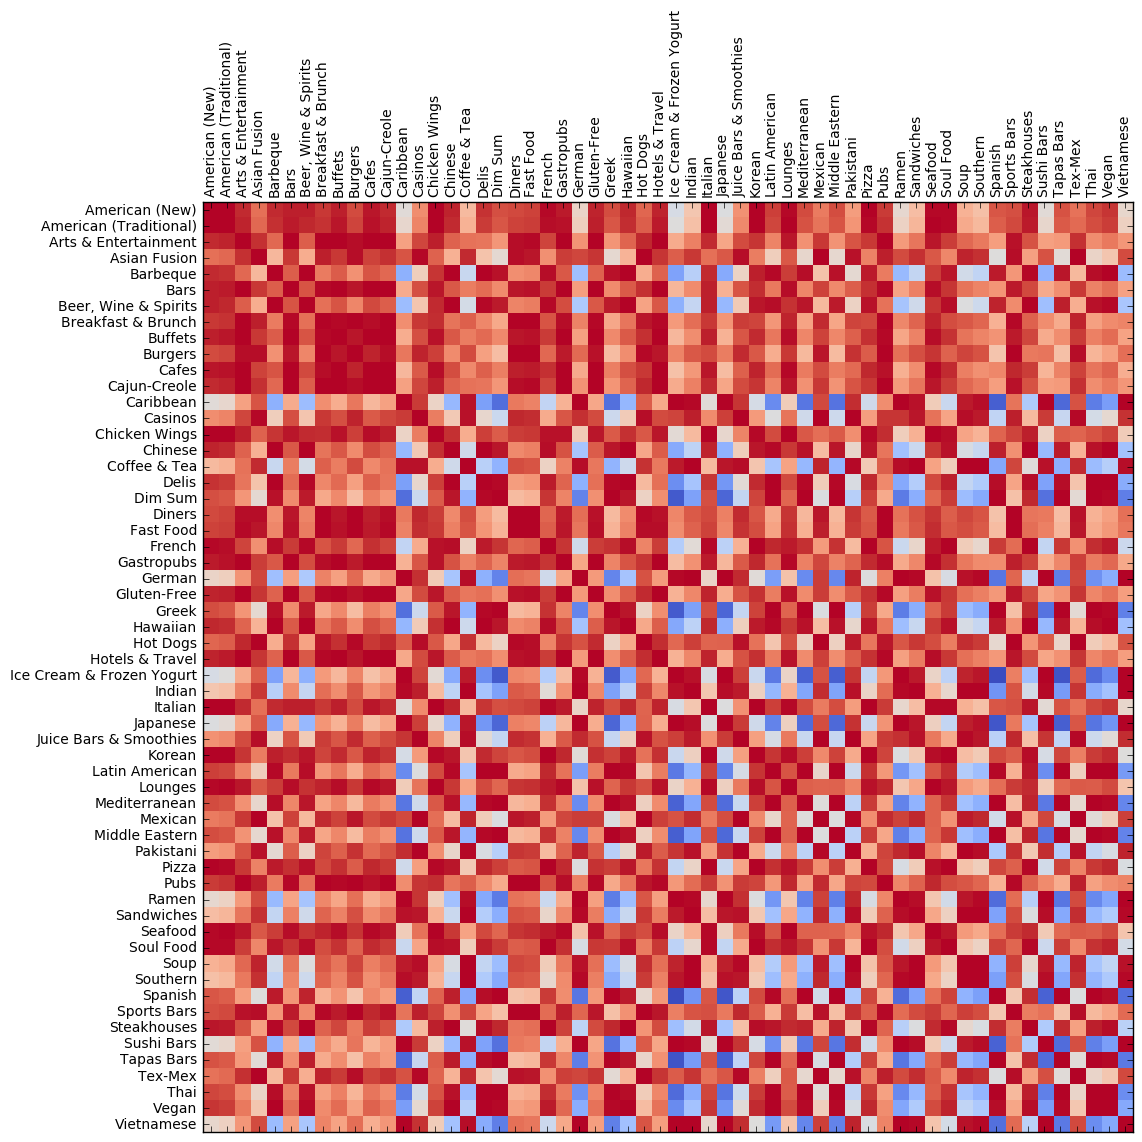

Number of topic: 5


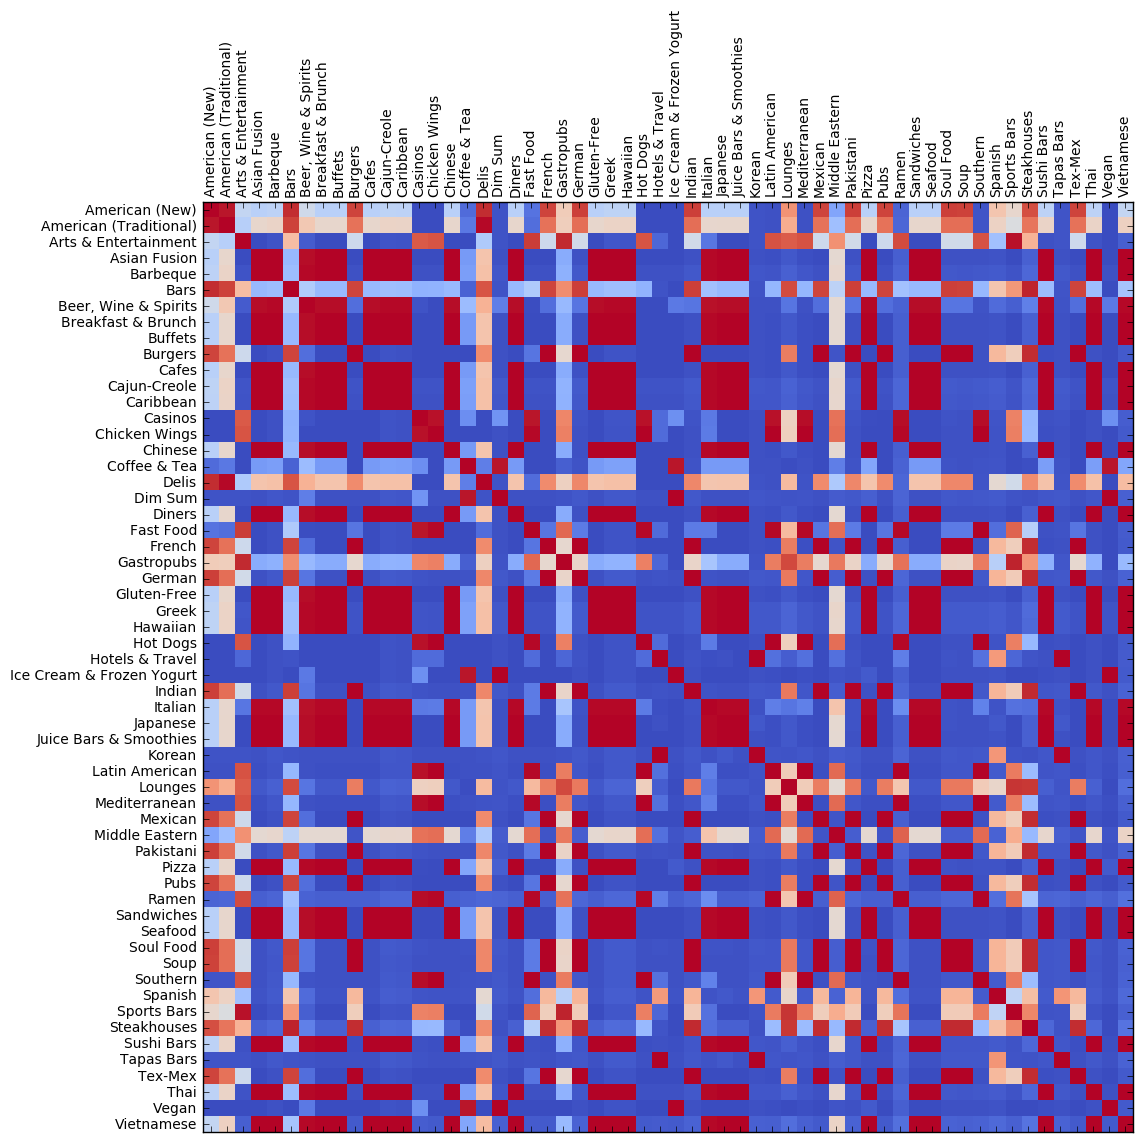

Number of topic: 10


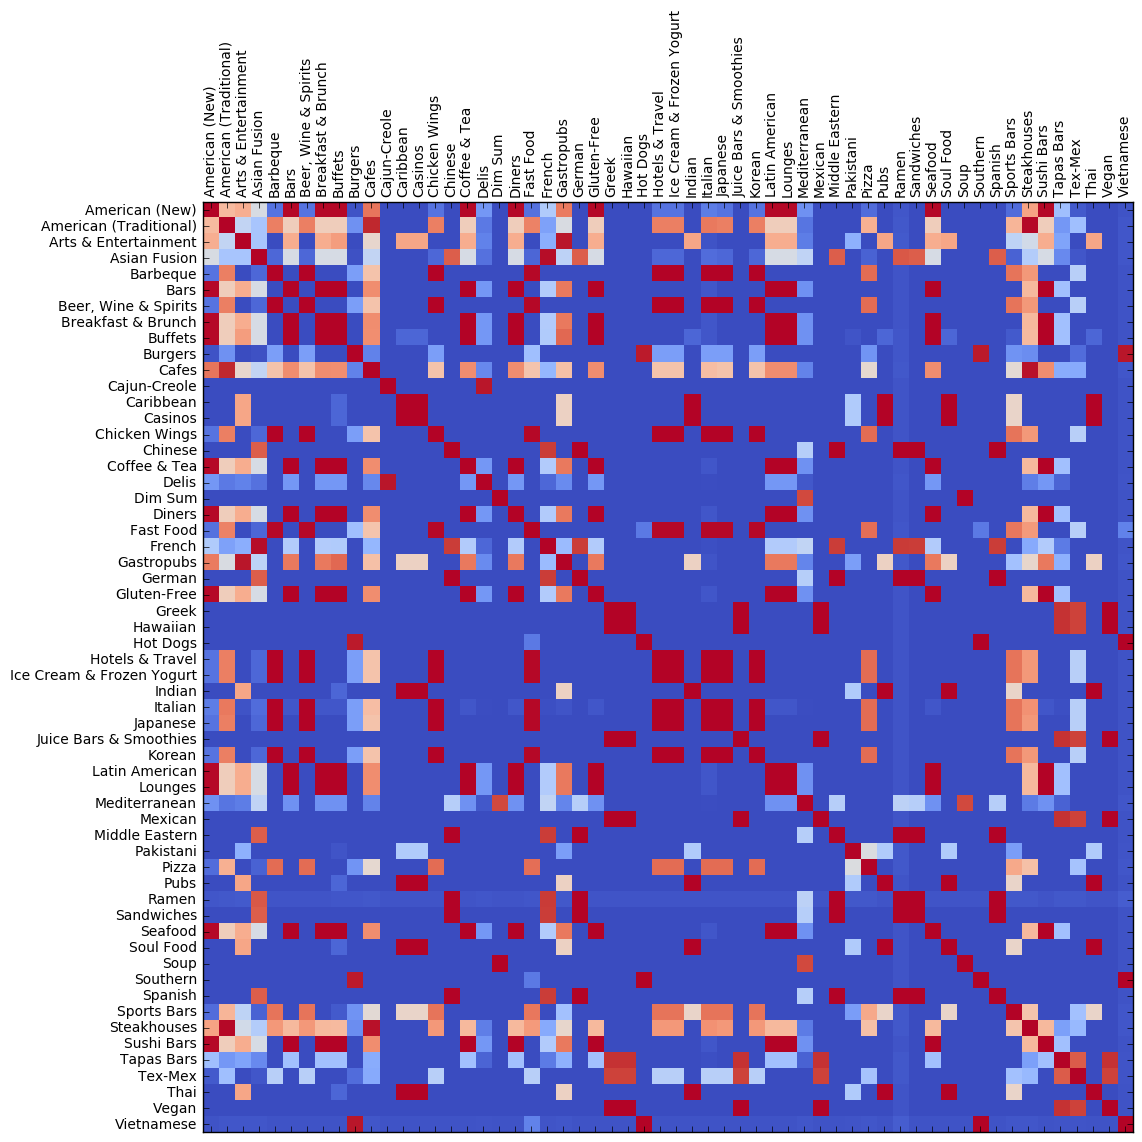

In [18]:
for i in [2,5,10]:
    draw_ntopic(i)